In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, accuracy_score, classification_report, calinski_harabasz_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from modelUtiliity import clean_column_replace_nan_with_1, process_CAFV, categorize_cafv_eligibility


# Read data from excel and create duplicate data frames for each models
df=pd.read_csv("https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD")
dataFrameRC = df.copy()
dataFrameDC = df.copy()
dataFrameLR = df.copy()
dataFrameLogReg = df.copy()

ModuleNotFoundError: No module named 'capstone_group03'

In [ ]:
# Cleaning
# Replacing NaNs
dataFrameDC = clean_column_replace_nan_with_1(dataFrameDC, 'Legislative District')
dataFrameDC = clean_column_replace_nan_with_1(dataFrameDC, 'Vehicle Location')

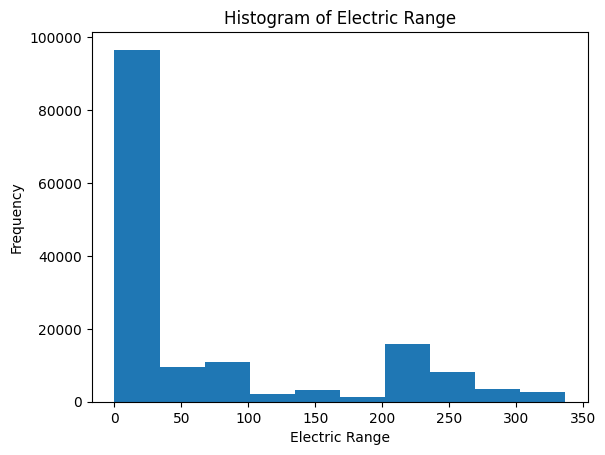

In [ ]:
# Exploratory data analysis 1

# Histogram
plt.hist(dataFrameLogReg["Electric Range"])
plt.title("Histogram of Electric Range")
plt.xlabel("Electric Range")
plt.ylabel("Frequency")
plt.show()

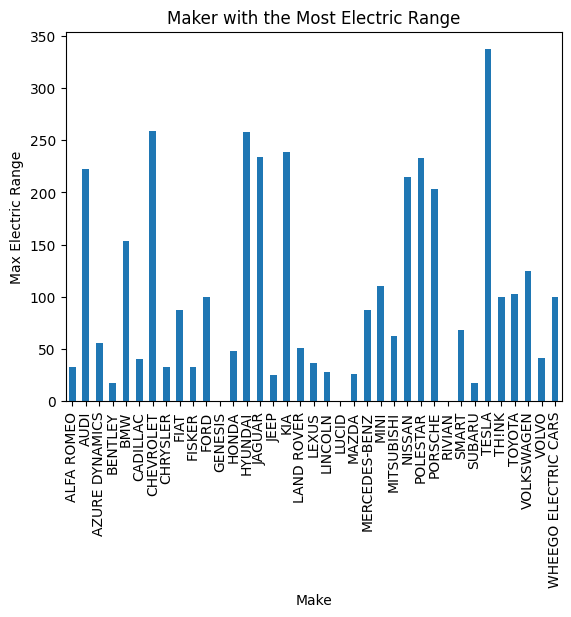

In [ ]:
# Exploratory data analysis 2

# Bar graph
dataFrameLR["Eligibility"]=dataFrameLR["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].apply(categorize_cafv_eligibility)
"""Data Cleaning
Filling Nans"""
dataFrameLR["County"].fillna("unknown", inplace=True)
dataFrameLR
dataFrameLR["2020 Census Tract"].fillna(0, inplace=True)

"""Deleting useless columns
We already know cities so there is no need to know exact point"""
dataFrameLR = dataFrameLR.drop("Vehicle Location", axis=1)
dataFrameLR=dataFrameLR.drop("DOL Vehicle ID", axis=1)

"""Tesla stands at the forefront when it comes to electric range leadership."""
maker_range = dataFrameLR.groupby("Make")["Electric Range"].max()
maker_range.plot(kind="bar")
plt.xlabel("Make")
plt.ylabel("Max Electric Range")
plt.title("Maker with the Most Electric Range")
plt.show()

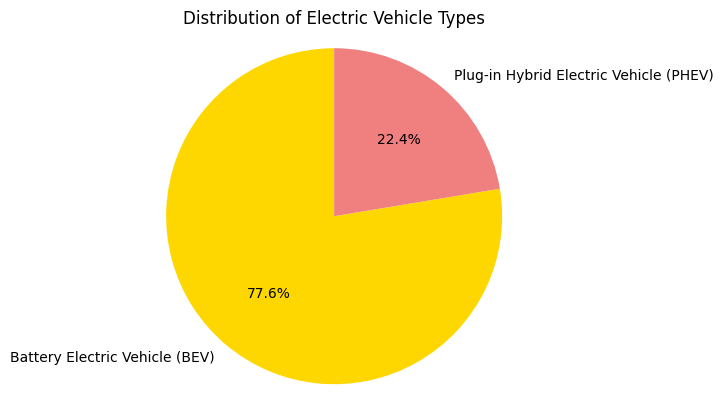

In [ ]:
# Exploratory data analysis 2

# Pie chart
vehicle_type_counts = dataFrameDC['Electric Vehicle Type'].value_counts()
plt.pie(vehicle_type_counts, labels=vehicle_type_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightcoral', 'lightskyblue'])
plt.title('Distribution of Electric Vehicle Types')
plt.axis('equal')
plt.show()

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_49803/3770230345.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Electric Vehicle Type', y='Electric Range', data=dataFrameDC, palette='pastel')


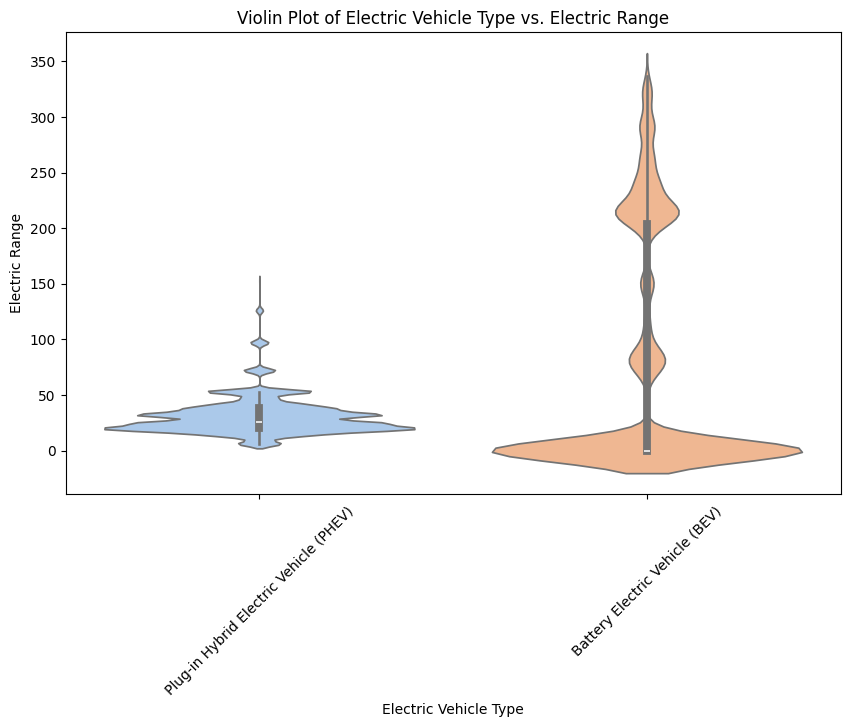

In [ ]:
# Exploratory data analysis 2

# Violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x='Electric Vehicle Type', y='Electric Range', data=dataFrameDC, palette='pastel')
plt.title('Violin Plot of Electric Vehicle Type vs. Electric Range')
plt.xticks(rotation=45)
plt.show()

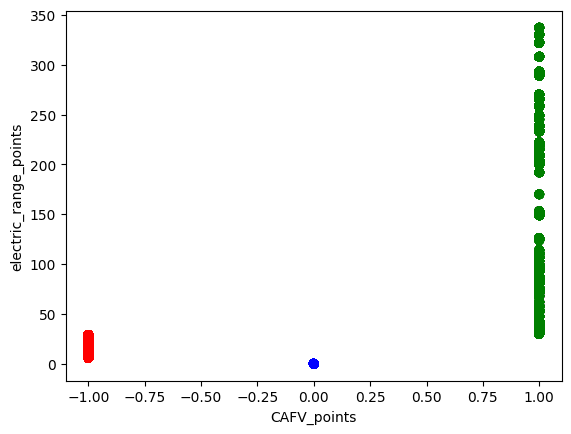

In [ ]:
# Exploratory data analysis 2

# scatter plot
dataFrameRC["CAFV"] = dataFrameRC["Clean Alternative Fuel Vehicle (CAFV) Eligibility"].apply(process_CAFV)
dataFrameRC[["Electric Range", 'CAFV']]
electric_range_points = np.array(dataFrameRC['Electric Range'])
CAFV_points = np.array(dataFrameRC['CAFV'])

color = []
for i in range(len(CAFV_points)):
  if CAFV_points[i] == -1:
    color.append("red")
  elif CAFV_points[i] == 0:
    color.append("blue")
  else:
    color.append("green")

plt.scatter(CAFV_points, electric_range_points, color = color)
plt.xlabel("CAFV_points")
plt.ylabel("electric_range_points")
plt.show()

Accuracy: 0.7751413898459338
Classification Report:
                                        precision    recall  f1-score   support

        Battery Electric Vehicle (BEV)       0.78      0.99      0.87     23809
Plug-in Hybrid Electric Vehicle (PHEV)       0.54      0.04      0.08      6957

                              accuracy                           0.78     30766
                             macro avg       0.66      0.52      0.47     30766
                          weighted avg       0.72      0.78      0.69     30766



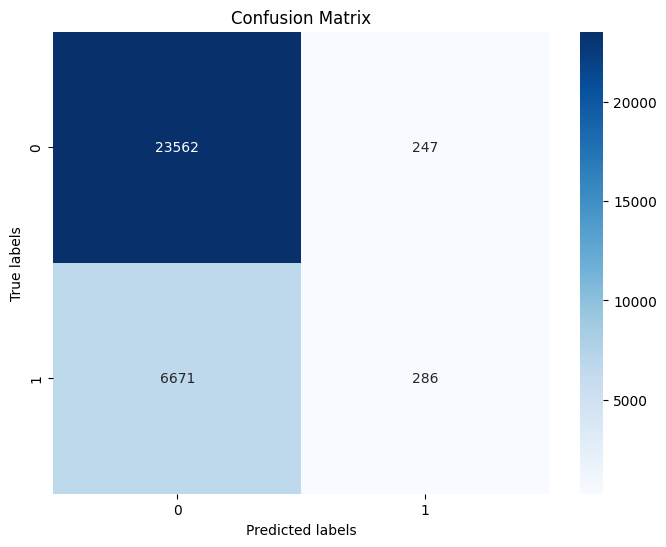

In [ ]:
# Model 1
# Decision tree

# Data preprocessing
label_encoder = LabelEncoder()
dataFrameDC['City'] = label_encoder.fit_transform(dataFrameDC['City'])
dataFrameDC['County'] = label_encoder.fit_transform(dataFrameDC['County'])
dataFrameDC['State'] = label_encoder.fit_transform(dataFrameDC['State'])

# Define features (X) and target variable (y)
features = ['City', 'County', 'State']
X = dataFrameDC[features]
y = dataFrameDC['Electric Vehicle Type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict Electric Vehicle Type on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_49803/2734653288.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Make'] = pd.Categorical(X['Make'])
/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_49803/2734653288.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Model'] = pd.Categorical(X['Model'])
/var/folders/d5/qv1hfsjx16d54flsx7nx5hwr0000gn/T/ipykernel_49803/2734653288.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

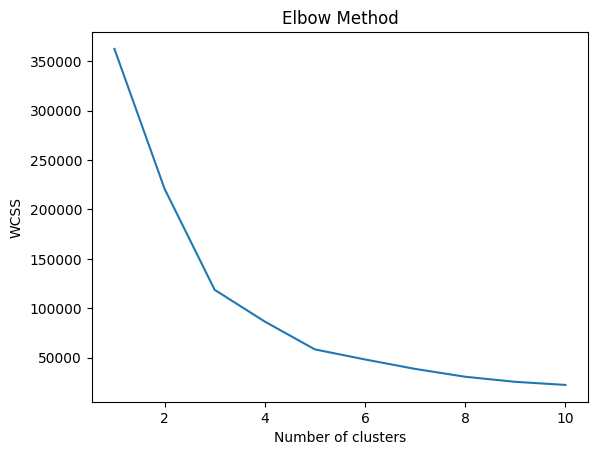

Cluster Centers:
[[ 0.28106093  0.51281953 -0.28080277 -0.38287447]
 [ 0.65114672 -0.0733863   0.94609727  1.16541633]
 [-1.27089787 -1.17402859 -0.17929985 -0.13140683]]


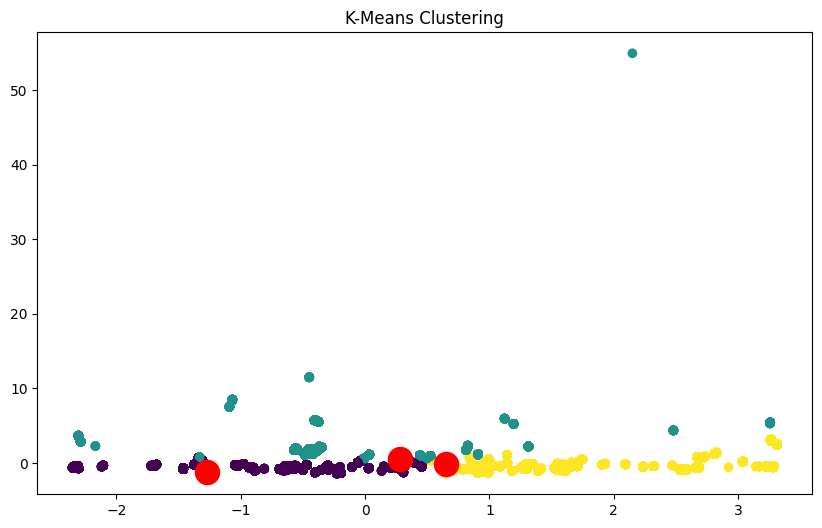

Calinski-Harabasz Score: 4362.051095436701


In [ ]:
# Model 2
# K means clustering
features = ['Make', 'Model', 'Base MSRP', 'Electric Range']

# Subset the data
X = dataFrameDC[features]

# Convert Make and Model to numerical values using Label Encoding
X['Make'] = pd.Categorical(X['Make'])
X['Model'] = pd.Categorical(X['Model'])
X['Make'] = X['Make'].cat.codes
X['Model'] = X['Model'].cat.codes

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph to find the optimal number of clusters
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Based on the Elbow graph, choose the optimal number of clusters and perform K-Means clustering
optimal_clusters = 3  # Adjust as needed
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_pca)

# Add cluster labels to the dataset
dataFrameDC['Cluster'] = kmeans.labels_

# Print the cluster centers
print("Cluster Centers:")
print(pca.inverse_transform(kmeans.cluster_centers_))

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(pca.inverse_transform(kmeans.cluster_centers_)[:, 0], pca.inverse_transform(kmeans.cluster_centers_)[:, 1], s=300, c='red')
plt.title('K-Means Clustering')
plt.show()

# Assuming you have already performed K-Means clustering and have 'kmeans' as the fitted model
calinski_score = calinski_harabasz_score(X, kmeans.labels_)
print("Calinski-Harabasz Score:", calinski_score)

Accuracy: 0.46700903594877463
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     12773
           1       0.47      1.00      0.64     14368
           2       0.00      0.00      0.00      3625

    accuracy                           0.47     30766
   macro avg       0.16      0.33      0.21     30766
weighted avg       0.22      0.47      0.30     30766



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

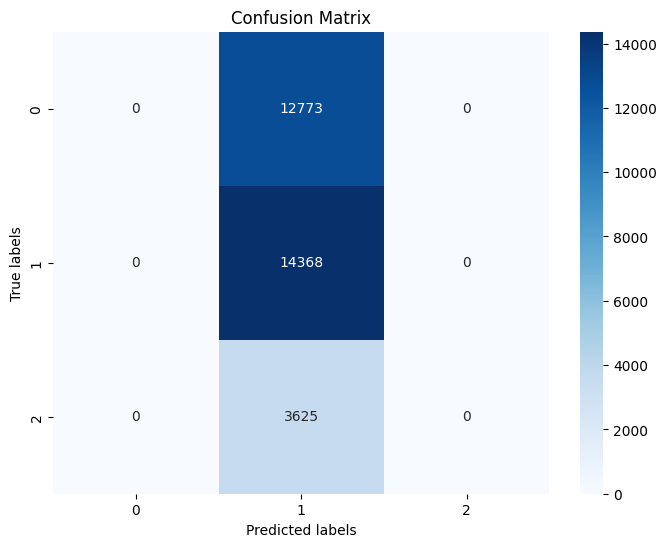

In [ ]:
# Model 3
# Logistic regression

label_encoder = LabelEncoder()
dataFrameDC['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = label_encoder.fit_transform(dataFrameDC['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

# Define features (X) and target variable (y)
X = dataFrameDC[['Legislative District']]
y = dataFrameDC['Clean Alternative Fuel Vehicle (CAFV) Eligibility']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
log_model = LogisticRegression(solver='liblinear', random_state=42)

# Fit the model on the training data
log_model.fit(X_train, y_train)

# Predict CAFV Eligibility on the test data
y_pred = log_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.4797178703763895
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.19      0.27     12773
           1       0.48      0.85      0.62     14368
           2       0.00      0.00      0.00      3625

    accuracy                           0.48     30766
   macro avg       0.31      0.35      0.30     30766
weighted avg       0.42      0.48      0.40     30766



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

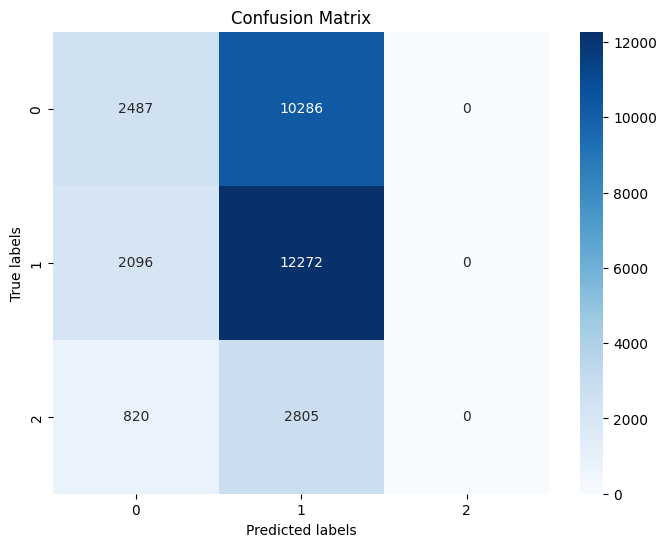

In [ ]:
# Model 4
# Gradient boost

# Data preprocessing
label_encoder = LabelEncoder()
dataFrameDC['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = label_encoder.fit_transform(dataFrameDC['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

# Define features (X) and target variable (y)
X = dataFrameDC[['Legislative District']]
y = dataFrameDC['Clean Alternative Fuel Vehicle (CAFV) Eligibility']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting classifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Predict CAFV Eligibility on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Model 5
#Linear Regression

features = ["Model Year"]
target = "Electric Range"

X = dataFrameLR[features]
y = dataFrameLR[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 7426.204902851321
R-squared: 0.19248427436586446


precision = 1.0, recall = 1.0


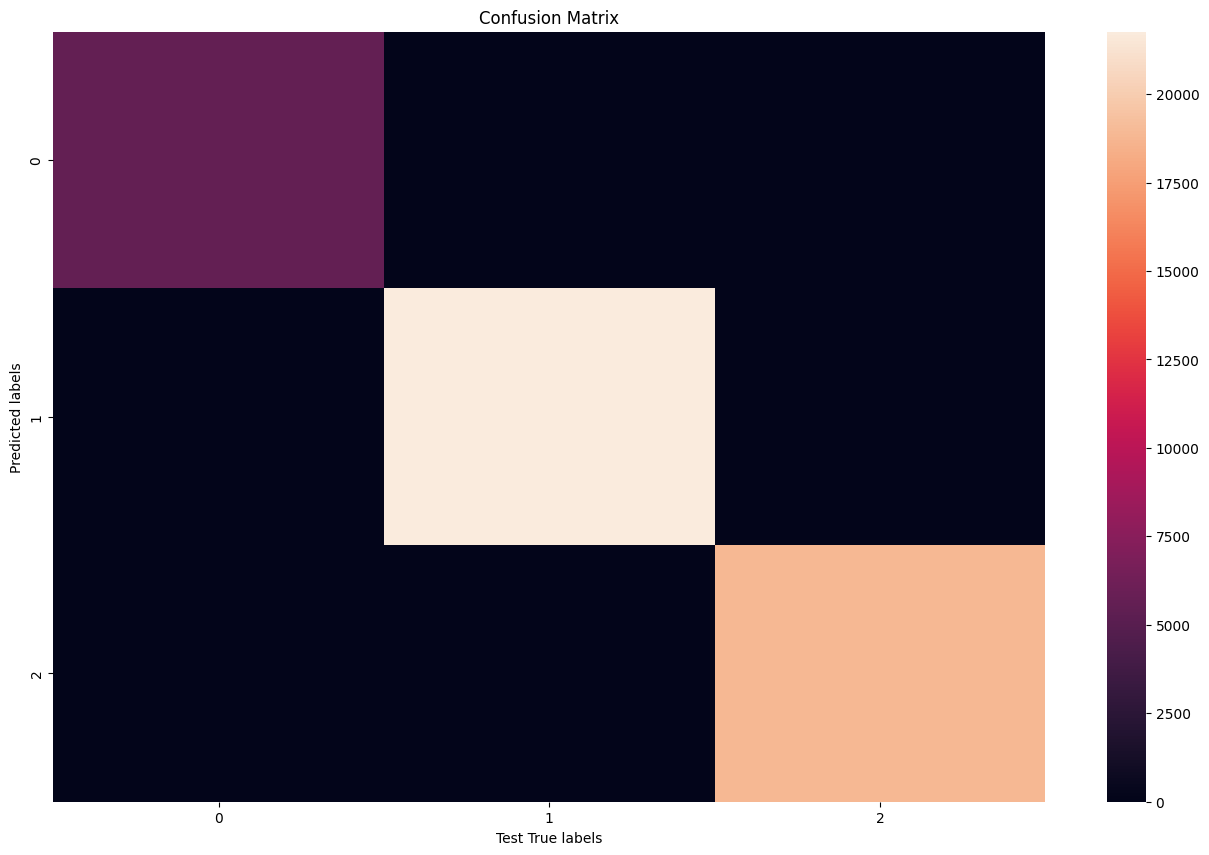

In [ ]:
# Model 6
# Random forest classifier
X_dataset = dataFrameRC[['Electric Range']]
y_dataset = dataFrameRC['CAFV']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, test_size=0.3, random_state=17)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, roc_curve
clf = clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("precision = {}, recall = {}".format(precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro')))

confusion_matrix(y_test, y_pred)

# create heatmap for the calculated correlation
plt.figure(figsize=(16,10))
sns.heatmap(confusion_matrix(y_pred, y_test))
plt.ylabel('Predicted labels')
plt.xlabel('Test True labels')
plt.title('Confusion Matrix')
plt.show()